In [11]:
import os
import pandas as pd

current_dir = os.getcwd()
path_file = os.path.join(current_dir, "defects_data.csv")
data = pd.read_csv(path_file, header=0)

In [ ]:
import os
import pandas as pd

current_dir = os.getcwd()
path_file = os.path.join(current_dir, "defects_data.csv")
data = pd.read_csv(path_file, header=0)

In [12]:
X = data.drop('severity', axis=1)
y = data['severity']

In [15]:
from sklearn.preprocessing import LabelEncoder

# Identificar colunas categóricas em X
categorical_columns = X.select_dtypes(include=['object']).columns

# Codificar variáveis categóricas em X
for col in categorical_columns:
    X[col] = LabelEncoder().fit_transform(X[col])

# Codificar a variável de saída (y)
y = LabelEncoder().fit_transform(y)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)

In [20]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [22]:
from sklearn.metrics import accuracy_score

# Avaliar a acurácia no conjunto de treinamento
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Acurácia no conjunto de treinamento: {train_accuracy:.2f}')
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia no conjunto de teste: {test_accuracy:.2f}')

Acurácia no conjunto de treinamento: 1.00
Acurácia no conjunto de teste: 0.38


In [24]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(
    model,
    X,
    y,
    cv=5,
    scoring='accuracy',
    return_train_score=True)  

In [25]:
for fold_idx in range(len(cv_results['test_score'])):
    print(f'Fold {fold_idx + 1}:')
    print(f'  Acurácia no treino: {cv_results["train_score"][fold_idx]:.2f}')
    print(f'  Acurácia no teste: {cv_results["test_score"][fold_idx]:.2f}')
    print()

Fold 1:
  Acurácia no treino: 1.00
  Acurácia no teste: 0.32

Fold 2:
  Acurácia no treino: 1.00
  Acurácia no teste: 0.29

Fold 3:
  Acurácia no treino: 1.00
  Acurácia no teste: 0.38

Fold 4:
  Acurácia no treino: 1.00
  Acurácia no teste: 0.35

Fold 5:
  Acurácia no treino: 1.00
  Acurácia no teste: 0.38



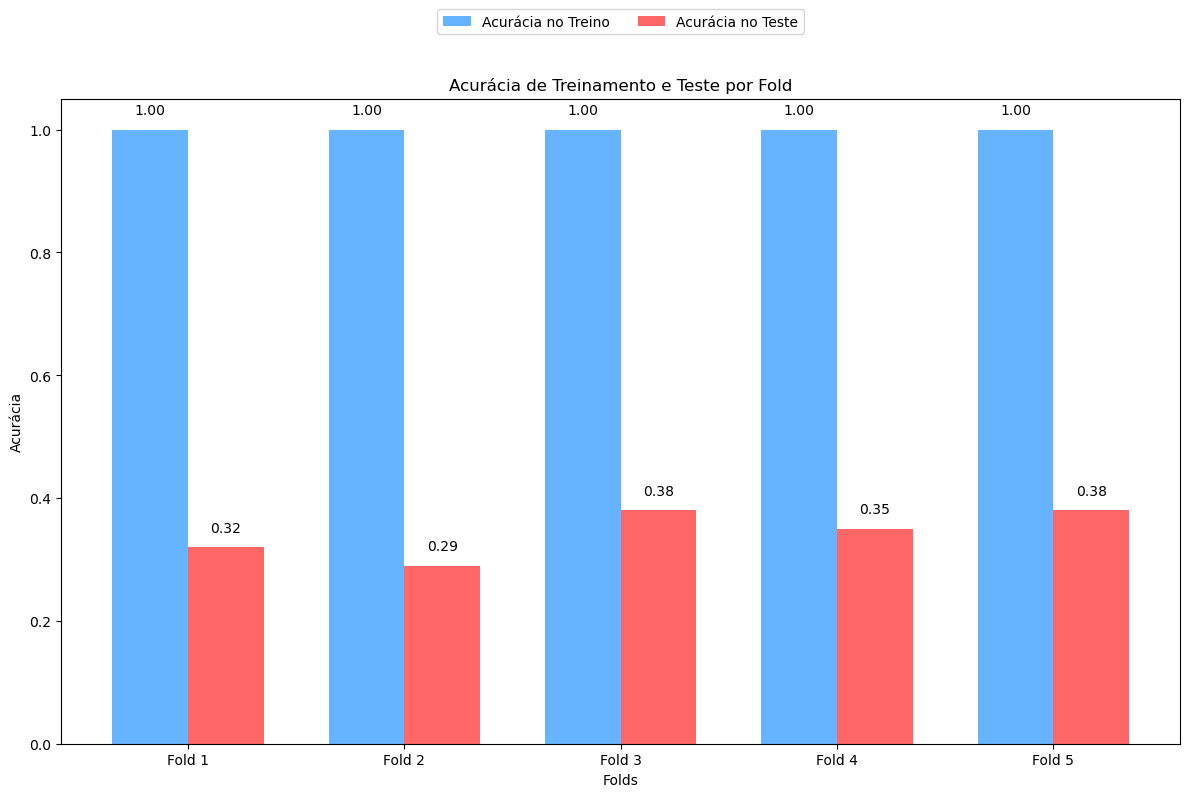

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Resultados de acurácia de treino e teste para cada fold
train_accuracy = [1.00, 1.00, 1.00, 1.00, 1.00]
test_accuracy = [0.32, 0.29, 0.38, 0.35, 0.38]

# Número de folds
folds = [f'Fold {i+1}' for i in range(5)]

# Criando o gráfico de barras
x = np.arange(len(folds))  # Localização dos rótulos (folds)
width = 0.35  # Largura das barras

# Plotando as barras para treino e teste
fig, ax = plt.subplots(figsize=(12, 8))
bars1 = ax.bar(x - width/2, train_accuracy, width, label='Acurácia no Treino', color='#66b3ff')
bars2 = ax.bar(x + width/2, test_accuracy, width, label='Acurácia no Teste', color='#ff6666')

# Adicionando labels e título
ax.set_xlabel('Folds')
ax.set_ylabel('Acurácia')
ax.set_title('Acurácia de Treinamento e Teste por Fold')
ax.set_xticks(x)
ax.set_xticklabels(folds)

# Adicionando os valores das acurácias em cada barra
for bar in bars1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

for bar in bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

# Colocando a legenda na parte superior do gráfico
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)

# Ajustando as margens do gráfico para dar mais espaço no topo
plt.subplots_adjust(top=0.85)  # Aumenta o espaço na parte superior

# Exibindo o gráfico
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score


# Número de épocas (iterações)
epochs = 10

# Armazenando as acurácias de treino e teste para cada época
train_accuracies = []
test_accuracies = []

# Treinando por múltiplas épocas
for epoch in range(epochs):
    # Treinando o modelo
    model.fit(X_train, y_train)

    # Acurácia no treino
    train_preds = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_preds)

    # Acurácia no teste
    test_preds = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_preds)

    # Armazenando as acurácias
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    # Exibindo os resultados de cada época
    print(f'Época {epoch + 1}/{epochs} - Acurácia no treino: {train_accuracy:.2f} - Acurácia no teste: {test_accuracy:.2f}')

# Usando validação cruzada para obter uma média mais precisa
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f'Acurácia média com validação cruzada: {cv_scores.mean():.2f}')

Época 1/10 - Acurácia no treino: 1.00 - Acurácia no teste: 0.38
Época 2/10 - Acurácia no treino: 1.00 - Acurácia no teste: 0.38
Época 3/10 - Acurácia no treino: 1.00 - Acurácia no teste: 0.38
Época 4/10 - Acurácia no treino: 1.00 - Acurácia no teste: 0.38
Época 5/10 - Acurácia no treino: 1.00 - Acurácia no teste: 0.38
Época 6/10 - Acurácia no treino: 1.00 - Acurácia no teste: 0.38
Época 7/10 - Acurácia no treino: 1.00 - Acurácia no teste: 0.38
Época 8/10 - Acurácia no treino: 1.00 - Acurácia no teste: 0.38
Época 9/10 - Acurácia no treino: 1.00 - Acurácia no teste: 0.38
Época 10/10 - Acurácia no treino: 1.00 - Acurácia no teste: 0.38
Acurácia média com validação cruzada: 0.34
